In [1]:
import numpy as np
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt
from params import *

In [2]:
save = True

In [3]:
def get_sec(time_str): # get seconds from time 
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [4]:
timestamps_files = glob.glob('../data/timestamps_*/*')

In [5]:
timestamps_files

['../data\\timestamps_ses_01\\P01PPILNI_2022-05-12 10 41 43.json',
 '../data\\timestamps_ses_01\\P03PBABCO_2022-05-12 11 17 55.json',
 '../data\\timestamps_ses_01\\P04PROMCH_2022-05-12 12 28 16.json',
 '../data\\timestamps_ses_01\\P05PROZEM_2022-05-12 11 58 48.json',
 '../data\\timestamps_ses_01\\P06PHERAX_2022-05-12 12 29 50.json',
 '../data\\timestamps_ses_02\\P07GHOLE_2022-05-19 10 38 51.json',
 '../data\\timestamps_ses_02\\P08AKKOR_2022-05-19 10 54 09.json',
 '../data\\timestamps_ses_02\\P09COUAM_2022-05-19 11 18 20.json',
 '../data\\timestamps_ses_02\\P10LEVVA_2022-05-19 11 33 06.json',
 '../data\\timestamps_ses_02\\P11KERSA_2022-05-19 11 53 54.json',
 '../data\\timestamps_ses_02\\P12BOULI_2022-05-19 12 05 20.json',
 '../data\\timestamps_ses_03\\P13MORMA 9h45 1_2022-05-23 10_37_15.json',
 '../data\\timestamps_ses_03\\P14BENLA 10h14 -05-23 11 23 24.json',
 '../data\\timestamps_ses_03\\P15LEPMA 10h00 3_2022-05-23 10_59_49.json',
 '../data\\timestamps_ses_03\\P16MAUAD 10h41 1_2022-05

In [6]:
rows = []
for file in timestamps_files:

    with open(file, 'r') as f:
        data = json.load(f)
    df_p = pd.DataFrame.from_dict(data, orient = 'index').T

    substraction = get_sec(df_p.iloc[0, 2].split(' ')[1]) # datetime in secs of t0_in (start baseline)

    for i in range(2, df_p.size, 2): # loop from t0_in to t8_in by step = 2 to get only t_in

        participant = df_p.iloc[0, 0]
        real_start_datetime = df_p.iloc[0, i].split(' ')[1] # datetime
        real_stop_datetime = df_p.iloc[0, i+1].split(' ')[1] # datetime
        real_start = get_sec(real_start_datetime) # datetime in secs
        real_stop = get_sec(real_stop_datetime) # datetime in secs
        start_secs = real_start - substraction # secs from start
        stop_secs = real_stop - substraction # datetime in secs
        duration = stop_secs - start_secs
        room = rooms[int(list(df_p.columns[i])[1])]
        row = [participant , room, start_secs, stop_secs, duration, real_start, real_stop, real_start_datetime, real_stop_datetime]
        rows.append(row)
    
df_timestamps = pd.DataFrame(rows, columns = ['participant','room','start','stop', 'duration', 'start date' , 'stop date', 'start datetime','stop datetime'])
    


In [7]:
df_timestamps.set_index(['participant','room'])

start  stop  duration  start date  stop date  \
participant room                                                             
P01PPILNI   Baseline              0   193       193       33972      34165   
            Take-off            563   801       238       34535      34773   
            Savannah            809  1051       242       34781      35023   
            Canopy             1070  1359       289       35042      35331   
            Bats               1370  1801       431       35342      35773   
...                             ...   ...       ...         ...        ...   
P18BLAMA    Bats               1067  1136        69       41848      41917   
            Underground        1189  1238        49       41970      42019   
            Grassland          1241  1602       361       42022      42383   
            Sea                1605  1835       230       42386      42616   
            End of the world   1853  2372       519       42634      43153   

                             start datetime stop datetime  
participant room                                           
P01PPILNI   Baseline               09:26:12      09:29:25  
            Take-off               09:35:35      09:39:33  
            Savannah               09:39:41      09:43:43  
            Canopy                 09:44:02      09:48:51  
            Bats                   09:49:02      09:56:13  
...                                     ...           ...  
P18BLAMA    Bats                   11:37:28      11:38:37  
            Underground            11:39:30      11:40:19  
            Grassland              11:40:22      11:46:23  
            Sea                    11:46:26      11:50:16  
            End of the world       11:50:34      11:59:13  

[153 rows x 7 columns]

In [8]:
sum(df_timestamps['duration'] < 120)

12

In [9]:
df_timestamps[df_timestamps['duration'] < 90]

,participant,room,start,stop,duration,start date,stop date,start datetime,stop datetime
18,P04PROMCH,Baseline,0,3,3,37850,37853,10:30:50,10:30:53
21,P04PROMCH,Canopy,956,1007,51,38806,38857,10:46:46,10:47:37
38,P06PHERAX,Savannah,719,798,79,41803,41882,11:36:43,11:38:02
65,P09COUAM,Savannah,748,749,1,37586,37587,10:26:26,10:26:27
104,P13MORMA,Underground,1470,1544,74,36551,36625,10:09:11,10:10:25
145,P18BLAMA,Take-off,523,595,72,41304,41376,11:28:24,11:29:36
148,P18BLAMA,Bats,1067,1136,69,41848,41917,11:37:28,11:38:37
149,P18BLAMA,Underground,1189,1238,49,41970,42019,11:39:30,11:40:19


In [10]:
df_timestamps['duration'].describe()

count     153.000000
mean      365.169935
std       246.978605
min         1.000000
25%       214.000000
50%       267.000000
75%       434.000000
max      1120.000000
Name: duration, dtype: float64

In [11]:
df_timestamps[df_timestamps['duration'] > 600]

,participant,room,start,stop,duration,start date,stop date,start datetime,stop datetime
6,P01PPILNI,Grassland,2341,3357,1016,36313,37329,10:05:13,10:22:09
8,P01PPILNI,End of the world,3815,4529,714,37787,38501,10:29:47,10:41:41
15,P03PBABCO,Grassland,2126,2802,676,38032,38708,10:33:52,10:45:08
17,P03PBABCO,End of the world,3647,4767,1120,39553,40673,10:59:13,11:17:53
23,P04PROMCH,Underground,1119,1790,671,38969,39640,10:49:29,11:00:40
24,P04PROMCH,Grassland,1795,2748,953,39645,40598,11:00:45,11:16:38
26,P04PROMCH,End of the world,3203,3910,707,41053,41760,11:24:13,11:36:00
33,P05PROZEM,Grassland,1955,2978,1023,40999,42022,11:23:19,11:40:22
35,P05PROZEM,End of the world,3422,4083,661,42466,43127,11:47:46,11:58:47
42,P06PHERAX,Grassland,1815,2756,941,42899,43840,11:54:59,12:10:40


In [12]:
if save:
    print('SAVE')
    df_timestamps.to_excel('../data/df_timestamps.xlsx')

SAVE


Text(0.5, 0, 'Room label')

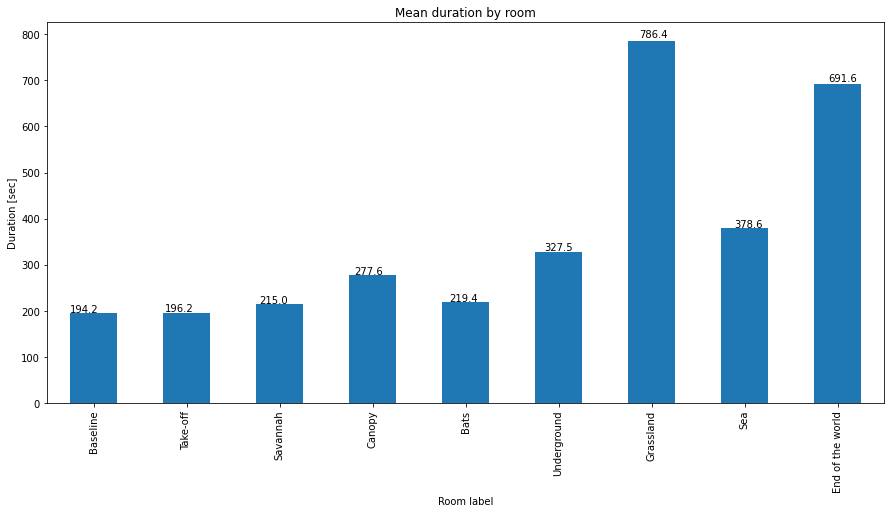

In [13]:
fig , ax = plt.subplots(figsize = (15,7))
df_timestamps.groupby('room').mean().sort_values(by = 'start')['duration'].round(1).plot.bar(ax=ax)
ax.set_title('Mean duration by room')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.01))
ax.set_ylabel('Duration [sec]')
ax.set_xlabel('Room label')
# plt.savefig('../figures/barplot_duration_rooms', bbox_inches='tight')